# L6 : Linear Regression (Follow CRISP-DM)
<img src="crisp.png" >

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score

## Step 1: Load Data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
h    29 non-null int64
v    29 non-null float64
dtypes: float64(1), int64(1)
memory usage: 544.0 bytes
      h       v
0   139   551.5
1    43   215.5
2   140   555.0
3   100   415.0
4   161   628.5
5   288  1073.0
6   200   765.0
7   289  1076.5
8   122   492.0
9   203   775.5
10   73   320.5
11   34   184.0
12  157   614.5
13   15   117.5
14  136   541.0
15   18   128.0
16   53   250.5
17  293  1090.5
18  257   964.5
19  131   523.5
20   58   268.0
21  278  1038.0
22  185   712.5
23  274  1024.0
24  148   583.0
25  184   709.0
26  173   670.5
27  275  1027.5
28  207   789.5 None


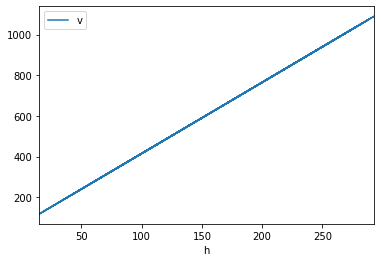

In [57]:
data = pd.read_csv("training2.csv")
print(data, data.info())
data.plot('h','v')

## Step 2: Prepare X, Y

In [58]:
X = data['h'].values.reshape(-1,1) # reshape(col, row)
Y = data['v'].values.reshape(-1,1)
print("X={},TypeOfX={},Y={},TypeOfY={}".format(X, type(X),Y, type(Y)))

X=[[139]
 [ 43]
 [140]
 [100]
 [161]
 [288]
 [200]
 [289]
 [122]
 [203]
 [ 73]
 [ 34]
 [157]
 [ 15]
 [136]
 [ 18]
 [ 53]
 [293]
 [257]
 [131]
 [ 58]
 [278]
 [185]
 [274]
 [148]
 [184]
 [173]
 [275]
 [207]],TypeOfX=<class 'numpy.ndarray'>,Y=[[ 551.5]
 [ 215.5]
 [ 555. ]
 [ 415. ]
 [ 628.5]
 [1073. ]
 [ 765. ]
 [1076.5]
 [ 492. ]
 [ 775.5]
 [ 320.5]
 [ 184. ]
 [ 614.5]
 [ 117.5]
 [ 541. ]
 [ 128. ]
 [ 250.5]
 [1090.5]
 [ 964.5]
 [ 523.5]
 [ 268. ]
 [1038. ]
 [ 712.5]
 [1024. ]
 [ 583. ]
 [ 709. ]
 [ 670.5]
 [1027.5]
 [ 789.5]],TypeOfY=<class 'numpy.ndarray'>


## Step 3: Model Training

In [61]:
model = LR()
model.fit(X,Y)
print("Slope(斜率)={},Intercept(截距)={}".format(model.coef_, model.intercept_))

Slope(斜率)=[[3.5]],Intercept(截距)=[65.]


## Step 4: Model Evaluation

In [63]:
score = model.score(X,Y)
preY = model.predict(X)
print(score, r2_score(Y, preY))

1.0 1.0


## Step 5: Deploy (Predict)

In [75]:
test = pd.read_csv("testing.csv")
print("data:{}".format(test.head()))
testX = test['x'].values.reshape(-1,1)
print(testX, np.info(testX))
testY = model.predict(testX)
test['y']=testY
test.head()

data:     x   y
0  765 NaN
1  212 NaN
2  235 NaN
3  654 NaN
4  476 NaN
class:  ndarray
shape:  (38, 1)
strides:  (8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7ff6dee68e40
byteorder:  little
byteswap:  False
type: int64
[[765]
 [212]
 [235]
 [654]
 [476]
 [342]
 [176]
 [739]
 [965]
 [532]
 [124]
 [205]
 [192]
 [248]
 [ 83]
 [981]
 [731]
 [972]
 [338]
 [ 32]
 [879]
 [136]
 [645]
 [  1]
 [ 74]
 [ 29]
 [901]
 [480]
 [670]
 [813]
 [674]
 [688]
 [869]
 [427]
 [465]
 [198]
 [115]
 [ 29]] None


,x,y
0,765,2742.5
1,212,807.0
2,235,887.5
3,654,2354.0
4,476,1731.0


In [76]:
# write data to result.csv with overwrite if file is exists.
test.to_csv("result2.csv",index=False, mode='w')